# Seconda esperienza: BJT emettitore comune senza capacità

## Import delle dipendenze

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

## Valori dei componenti utilizzati

In [21]:
V_CC = 12 #Volt
# Resistori (Ohm)
R_1 = 47000
R_2 = 6800
R_C = 4000
R_E = 470
R_S = 50
R_L = 0
# Condensatori (Farad)
C_i = 220e-9
C_o = 470e-9

## Dati raccolti

In [3]:
# Frequenze suggerite:
pts = 15
hint_nu = np.logspace(1,7, pts, base=10)
print(hint_nu)

[1.00000000e+01 2.68269580e+01 7.19685673e+01 1.93069773e+02
 5.17947468e+02 1.38949549e+03 3.72759372e+03 1.00000000e+04
 2.68269580e+04 7.19685673e+04 1.93069773e+05 5.17947468e+05
 1.38949549e+06 3.72759372e+06 1.00000000e+07]


In [4]:
V_in = np.array([])
V_out = np.array([])
nu = np.array([])

### Calcolo della finzione di trasferimento e della capacità di $C_1$ per avere $\nu_C = 100 Hz$

In [5]:
nu_c = 100 #Frequenza di taglio desiderata
T = V_out/V_in
C_1 = 1/(2*np.pi*(R_2+R_S)*nu_c)

nu_c_attesa = 1/(2*np.pi*(R_2+R_S)*C_i)
print(nu_c_attesa)

105.61044664359346


### Creazione di un DataFrame contenente i dati raccolti e i dati elaborati

In [6]:
table = {"nu (Hz)": nu, "V_in (V)": V_in, "V_out (V)": V_out, "T":T}
df = pd.DataFrame(table)

In [7]:
df

,nu (Hz),V_in (V),V_out (V),T


#### Conversione del DataFrame creato in formato LaTeX

In [8]:
df.to_latex()

"\\begin{tabular}{lrrrr}\n\\toprule\nEmpty DataFrame\nColumns: Index(['nu (Hz)', 'V\\_in (V)', 'V\\_out (V)', 'T'], dtype='object')\nIndex: RangeIndex(start=0, stop=0, step=1) \\\\\n\\bottomrule\n\\end{tabular}\n"

## Diagrammi di Bode

### Funzione di trasferimento

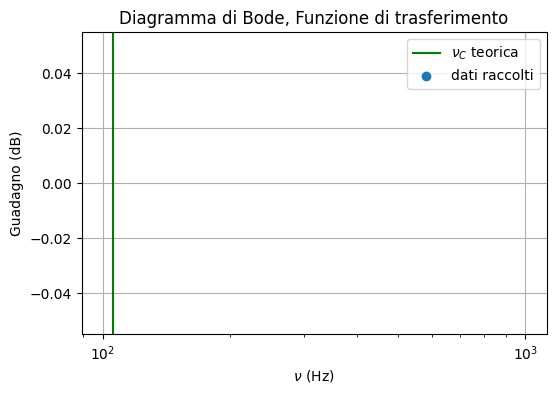

In [9]:
plt.xscale("log")
plt.scatter(nu,20*np.log(T), label="dati raccolti")
#plt.axhline(-3, color="red", label="-3dB") # Bisogna vedere se T_max == 1, altrimenti credo che questa ordinata non sia corretta
plt.axvline(nu_c_attesa, label="$\\nu_C$ teorica", color="green")
plt.legend()

plt.xlabel("$\\nu$ (Hz)")
plt.ylabel("Guadagno (dB)")
plt.grid()
plt.title("Diagramma di Bode, Funzione di trasferimento")
plt.savefig("Bode_T.png", dpi=300)

### Sfasamento

## Misura resistenza in uscita

In [10]:
R_out_teorico = R_C
R_L = 4000

In [11]:
# Misure effettuate per 3 frequenze IN BANDA:

# Senza carico:
V_out_senza_carico = np.array([])
# Con carico:
V_out_con_carico = np.array([])

In [12]:
R_out = R_L*(V_out_senza_carico/V_out_con_carico)

In [13]:
R_out.mean()

/tmp/ipykernel_4645/1945921810.py:1: RuntimeWarning: Mean of empty slice.
  R_out.mean()
/home/rosso/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [20]:
1/(2*np.pi*R_C*(C_o))

84.65688462334859